<a href="https://colab.research.google.com/github/CRSpradlin/natural-language-processing-course/blob/main/NLP%20Course%20Work/9.%20Spam%20Text%20Classification/SpamTextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Text Classification

## Bag of Words

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [115]:
x = ['which book is this', 'this is book and this is math']

In [116]:
cv = CountVectorizer()
count = cv.fit_transform(x)

In [117]:
cv.get_feature_names_out() # Complete dictionary of all words given as input

array(['and', 'book', 'is', 'math', 'this', 'which'], dtype=object)

In [118]:
count.toarray() # Bag of Words | Count of dictionary words for each input

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]])

In [119]:
bow = pd.DataFrame(count.toarray(), columns = cv.get_feature_names_out())
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


## Term Frequency

In [120]:
bow.shape

(2, 6)

In [121]:
tf = bow.copy()
for indexRow, row in tf.iterrows():
  for indexCol, col in row.items():
    tf.at[indexRow, indexCol] = tf.at[indexRow, indexCol]/sum(row)
tf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


## Inverse Document Frequency (IDF)
idf = log((1+N)/(n+1))+1 used in sklearn when smooth_idf = True

In [122]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [123]:
bools = bow.astype('bool') # Reduces the values down to weather or not if they are present in the sentence.

In [124]:
bools['is'].sum()

2

In [125]:
cols = bools.columns
cols

Index(['and', 'book', 'is', 'math', 'this', 'which'], dtype='object')

In [126]:
non_zero_words = []
for col in cols:
  non_zero_words.append(bools[col].sum())
non_zero_words

[1, 2, 2, 1, 2, 1]

In [127]:
idf = []
N = len(x) # 2
for index, col in enumerate(cols):
  idf.append(np.log((N + 1) / (non_zero_words[index]+1)) + 1)
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

## TFIDF `TF * IDF`
Calculating TFIDF using just a couple lines of code from sklearn instead of the manual processes above.

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [129]:
x

['which book is this', 'this is book and this is math']

In [130]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x)
x_tfidf.toarray()

array([[0.        , 0.44832087, 0.44832087, 0.        , 0.44832087,
        0.63009934],
       [0.39054766, 0.27787788, 0.55575576, 0.39054766, 0.55575576,
        0.        ]])

In [131]:
tfidf.idf_

array([1.40546511, 1.        , 1.        , 1.40546511, 1.        ,
       1.40546511])

In [132]:
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

## Load Spam Dataset

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
df = pd.read_csv('data/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [135]:
df.isnull().sum() # Any null values in the dataset?

label      0
message    0
length     0
punct      0
dtype: int64

In [136]:
df.shape

(5572, 4)

In [137]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

## Balance Dataset
We need to first balance the data set since currently is is "unbalanced".

In [138]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [139]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [140]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [141]:
ham = ham.sample(spam.shape[0])

In [142]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [143]:
data = pd.concat([ham, spam]) # Need to re-index since there may be a mix of data with the same index number
data.shape

(1494, 4)

In [144]:
data.value_counts('label')

label
ham     747
spam    747
Name: count, dtype: int64

## Exploratory Data Analysis

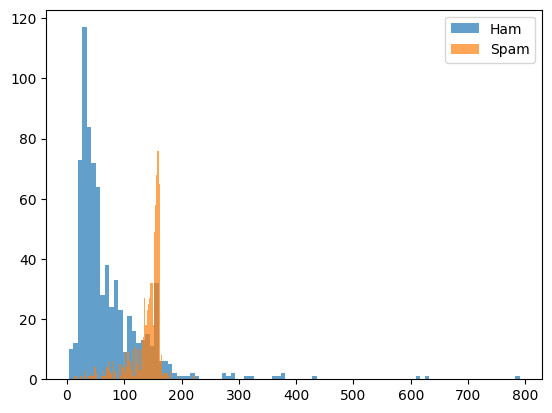

In [145]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='Ham')
plt.hist(spam['length'], bins=100, alpha=0.7, label='Spam')
plt.legend()
plt.show()

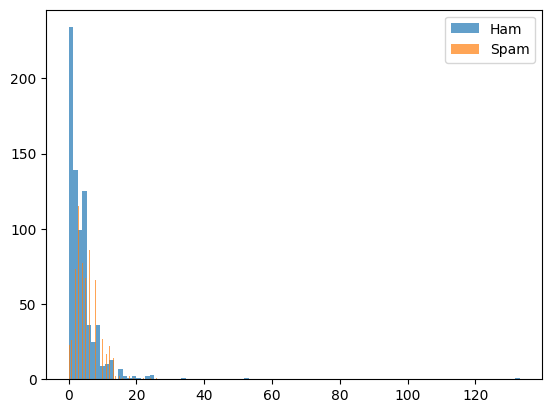

In [146]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='Ham')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='Spam')
plt.legend()
plt.show()

Seems like character length is a better representation of how to differentiate between "ham" and "spam" as compared to punctuation.

## Data Preparation for Training

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
data.head()

,label,message,length,punct
2966,ham,Not yet had..ya sapna aunty manege y'day hogid...,94,7
1669,ham,"Yes..but they said its IT.,",27,4
5035,ham,I want to go to perumbavoor,27,0
2786,ham,Yeah get the unlimited,22,0
2275,ham,Think I could stop by in like an hour or so? M...,89,2


In [150]:
tfidf = TfidfVectorizer()
data_tfidf = tfidf.fit_transform(data['message'])

In [151]:
data_tfidf = data_tfidf.toarray()

In [152]:
data_tfidf.shape

(1494, 4548)

In [153]:
x_train, x_test, y_train, y_test = train_test_split(data_tfidf, data['label'], test_size=0.2, random_state=0, stratify=data['label'])

In [154]:
x_train.shape, x_test.shape

((1195, 4548), (299, 4548))

## Training Your First Text Classifier

In [155]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1) # estimators = num of trees, jobs = number of cors (-1=all available)

In [156]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [157]:
y_pred = clf.predict(x_test)

In [158]:
confusion_matrix(y_test, y_pred)

array([[150,   0],
       [ 16, 133]])

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       150
        spam       1.00      0.89      0.94       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



## SVM

In [160]:
clf = SVC(C=1000,gamma='auto')

In [161]:
clf.fit(x_train, y_train)

SVC(C=1000, gamma='auto')

In [162]:
y_pred = clf.predict(x_test)

In [163]:
confusion_matrix(y_test, y_pred)

array([[150,   0],
       [ 19, 130]])

In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       150
        spam       1.00      0.87      0.93       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



## Test Model with Real Data

In [165]:
clf

SVC(C=1000, gamma='auto')

In [166]:
def predict(text):
  text = tfidf.transform([text])
  text = text.toarray()
  return clf.predict(text)

In [167]:
predict('hey, how are you?')

array(['ham'], dtype=object)

In [168]:
predict('you have got free tickets to the USA this summer!')

array(['spam'], dtype=object)